In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('heart_Disease_New.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [5]:
data.shape

(297, 14)

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [7]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [9]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


<AxesSubplot:>

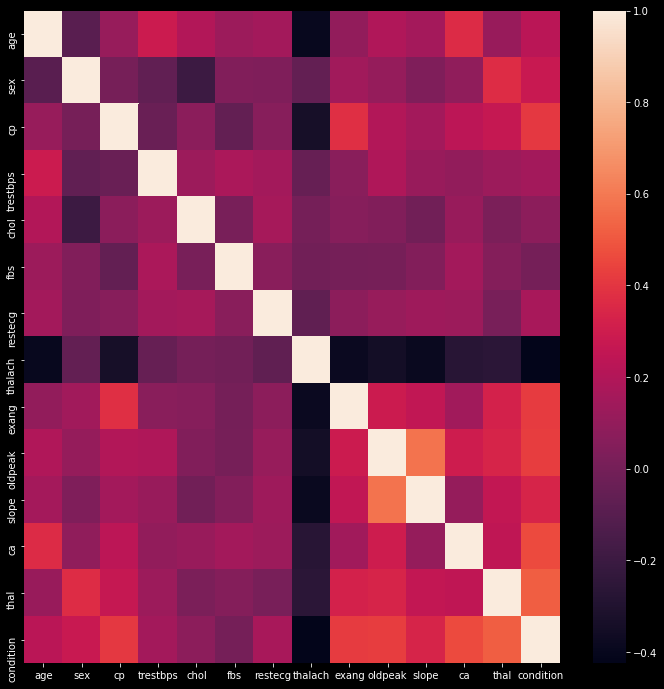

In [10]:
correlation = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

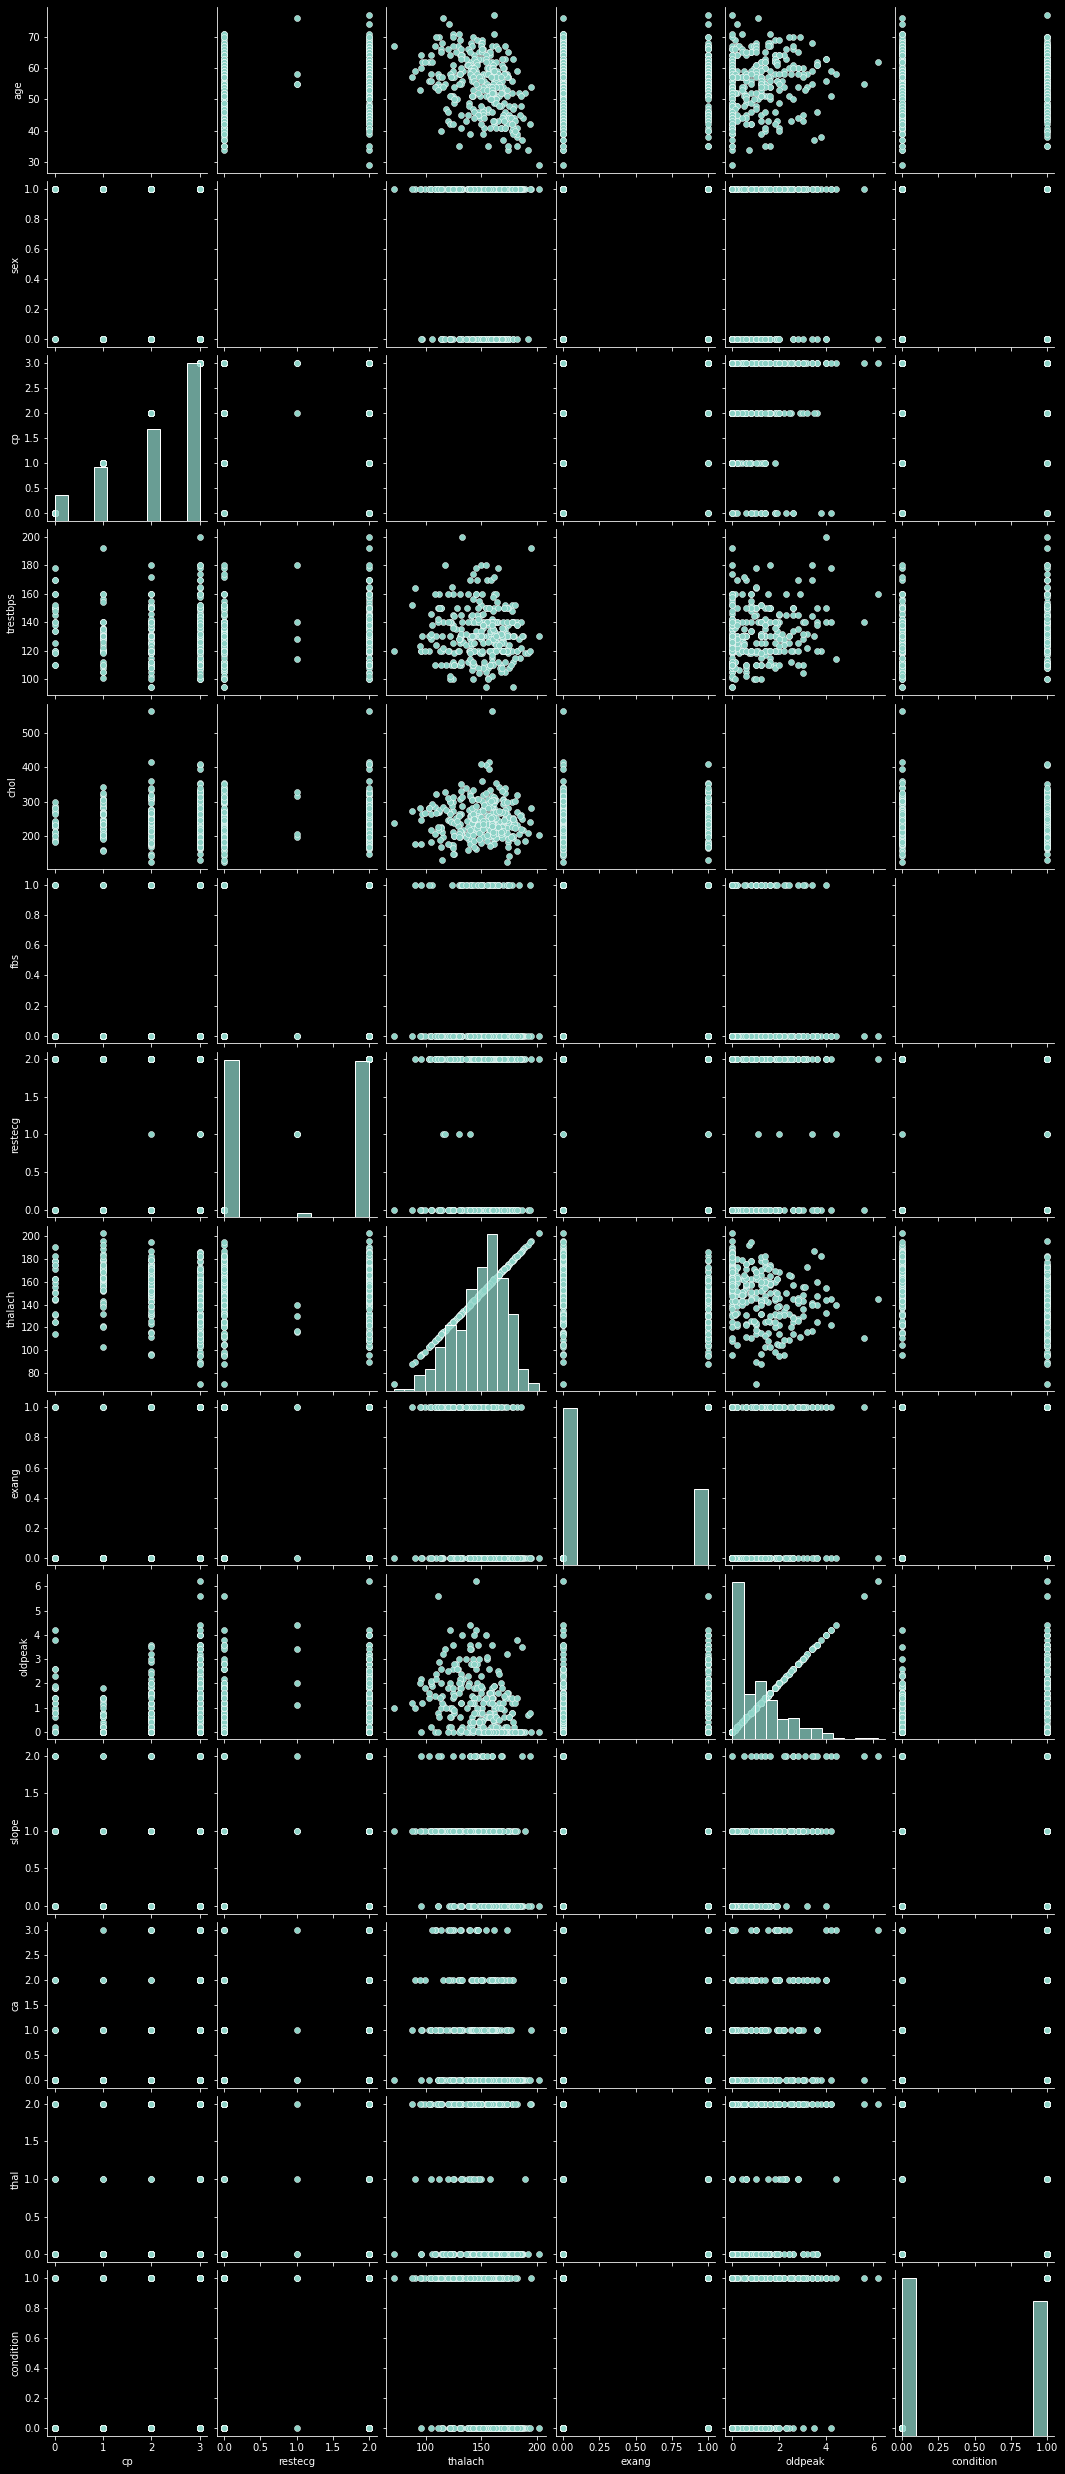

In [11]:
sns.pairplot(data, x_vars=['cp', 'restecg', 'thalach',
       'exang', 'oldpeak', 'condition'])

In [12]:
X = data.drop(columns=['condition'])
Y = pd.DataFrame(data.condition)

In [13]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [14]:
Y

,condition
0,0
1,0
2,0
3,1
4,0
...,...
292,1
293,1
294,1
295,0


In [15]:
Y.condition.value_counts()

0    160
1    137
Name: condition, dtype: int64

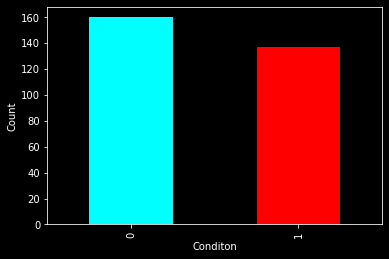

In [16]:
Y.condition.value_counts().plot(kind='bar', color=['cyan','red'])
plt.ylabel('Count')
plt.xlabel("Conditon")
plt.show()

<AxesSubplot:xlabel='age'>

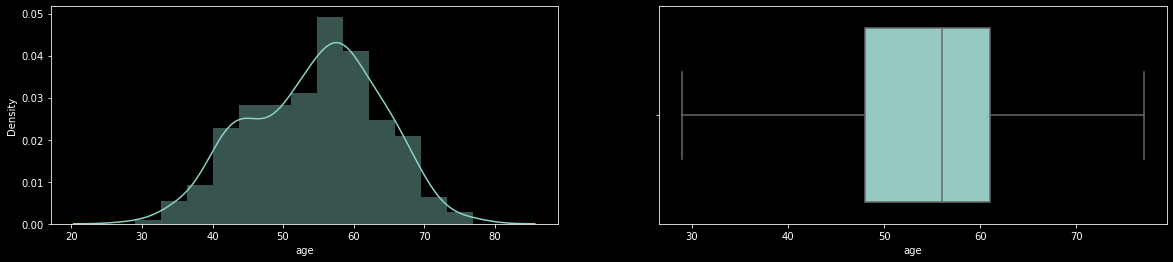

In [17]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(X['age'])
f.add_subplot(1,2,2)
sns.boxplot(X['age'])

(array([ 1.,  9., 32., 38., 35., 59., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

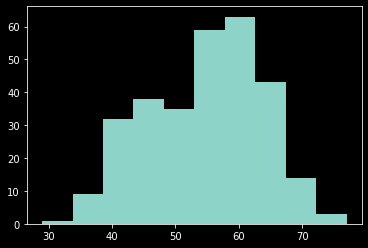

In [18]:
plt.hist(X.age)

In [19]:
X.sex.value_counts()

1    201
0     96
Name: sex, dtype: int64

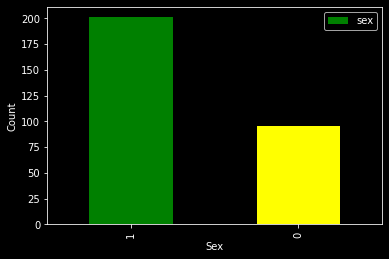

In [20]:
X.sex.value_counts().plot(kind='bar', color=['green', 'yellow'])
plt.ylabel('Count')
plt.xlabel("Sex")
plt.legend()
plt.show()

In [21]:
X.cp.value_counts()

3    142
2     83
1     49
0     23
Name: cp, dtype: int64

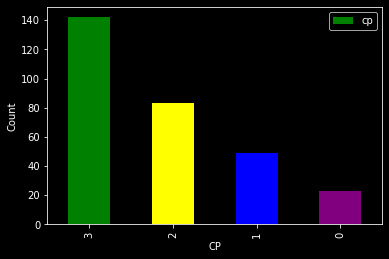

In [22]:
X.cp.value_counts().plot(kind='bar', color=['green', 'yellow', 'blue', 'purple'])
plt.ylabel('Count')
plt.xlabel("CP")
plt.legend()
plt.show()

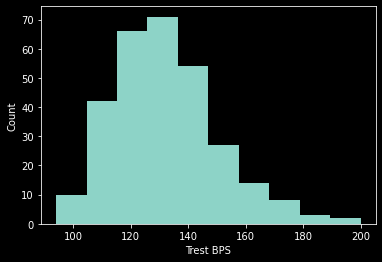

In [23]:
plt.hist(X.trestbps)
plt.ylabel('Count')
plt.xlabel("Trest BPS")
plt.show()

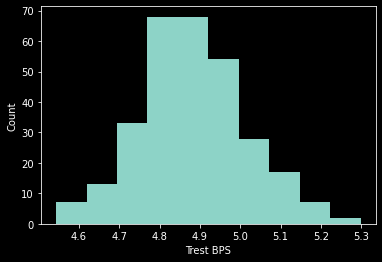

In [24]:
plt.hist(np.log(X.trestbps))
plt.ylabel('Count')
plt.xlabel("Trest BPS")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x268d6b15430>,
 'caps': [<matplotlib.lines.Line2D at 0x268d6b15af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x268d6b150d0>],
 'medians': [<matplotlib.lines.Line2D at 0x268d6b221f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x268d6b22550>],
 'means': []}

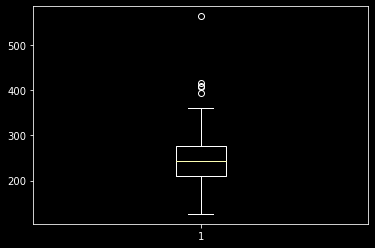

In [25]:
plt.boxplot(X.chol)

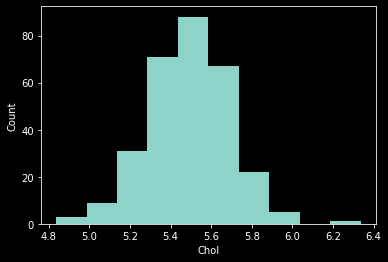

In [26]:
plt.hist(np.log(X.chol))
plt.ylabel('Count')
plt.xlabel("Chol")
plt.show()

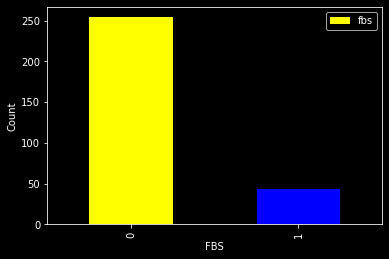

In [27]:
X.fbs.value_counts().plot(kind='bar', color=['yellow', 'blue'])
plt.ylabel('Count')
plt.xlabel("FBS")
plt.legend()
plt.show()

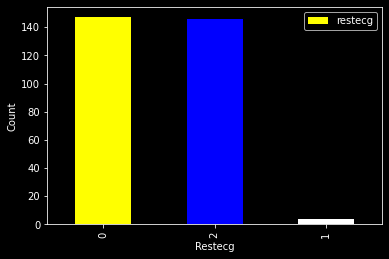

In [28]:
X.restecg.value_counts().plot(kind='bar', color=['yellow', 'blue', 'white'])
plt.ylabel('Count')
plt.xlabel("Restecg")
plt.legend()
plt.show()

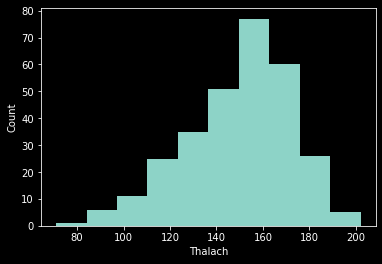

In [29]:
plt.hist(X.thalach)
plt.ylabel('Count')
plt.xlabel("Thalach")
plt.show()

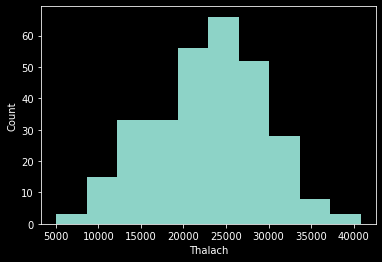

In [30]:
plt.hist(np.square(X.thalach))
plt.ylabel('Count')
plt.xlabel("Thalach")
plt.show()

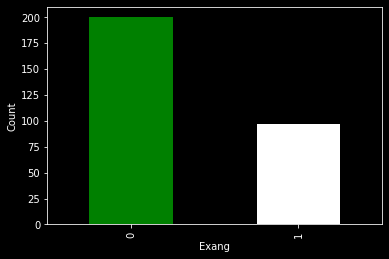

In [31]:
X.exang.value_counts().plot(kind='bar', color=['green', 'white'])
plt.ylabel('Count')
plt.xlabel("Exang")
plt.show()

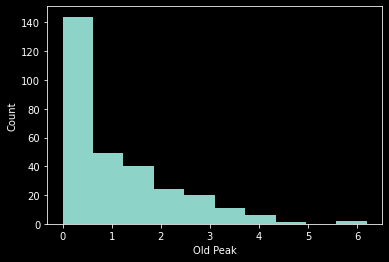

In [32]:
plt.hist(X.oldpeak)
plt.ylabel('Count')
plt.xlabel("Old Peak")
plt.show()

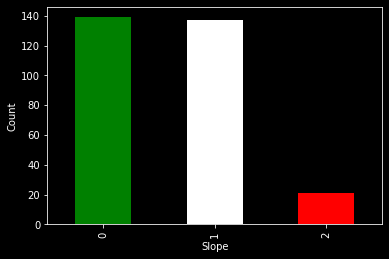

In [33]:
X.slope.value_counts().plot(kind='bar', color=['green', 'white', 'red'])
plt.ylabel('Count')
plt.xlabel("Slope")
plt.show()

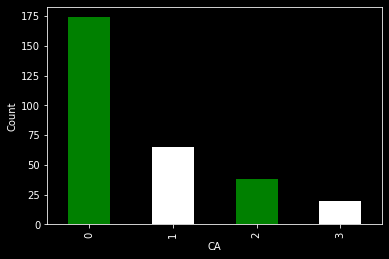

In [34]:
X.ca.value_counts().plot(kind='bar', color=['green', 'white'])
plt.ylabel('Count')
plt.xlabel("CA")
plt.show()

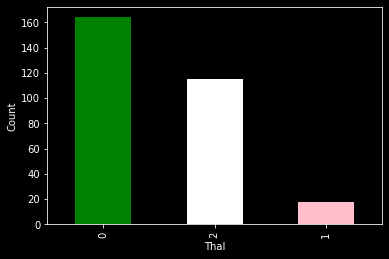

In [35]:
X.thal.value_counts().plot(kind='bar', color=['green', 'white', 'pink'])
plt.ylabel('Count')
plt.xlabel("Thal")
plt.show()

In [36]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.columns[:13])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.600302,0.691095,-2.240629,1.596266,-0.257179,2.430427,1.010199,-0.812095,-0.696419,-0.820813,0.643781,0.344824,-0.874292
1,1.600302,-1.446980,-2.240629,0.468418,-0.160859,-0.411450,-1.003419,0.061157,-0.696419,0.639470,-0.976583,1.411625,-0.874292
2,1.268242,-1.446980,-2.240629,1.032342,-0.411292,-0.411450,-1.003419,-1.554358,-0.696419,1.326662,2.264145,-0.721976,-0.874292
3,1.157555,0.691095,-2.240629,0.355633,0.667499,2.430427,1.010199,1.065396,-0.696419,0.295874,0.643781,0.344824,-0.874292
4,1.046868,0.691095,-2.240629,-1.223355,-0.700254,-0.411450,1.010199,-0.244481,1.435916,0.639470,0.643781,-0.721976,-0.874292


# Test Size = 20%

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [39]:
k_arr = []
val_arr = []
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((237, 13), (60, 13), (237, 1), (60, 1))

## K = 3

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=1)

In [41]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [42]:
y_pred = knn.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
val_arr.append(accuracy_score(Y_test, y_pred))
k_arr.append(3)
accuracy_score(Y_test, y_pred)

0.7166666666666667

In [45]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        32
           1       0.66      0.82      0.73        28

    accuracy                           0.72        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.73      0.72      0.72        60



In [46]:
confusion_matrix(Y_test, y_pred)

array([[20, 12],
       [ 5, 23]], dtype=int64)

Text(0.5, 15.0, 'Actual')

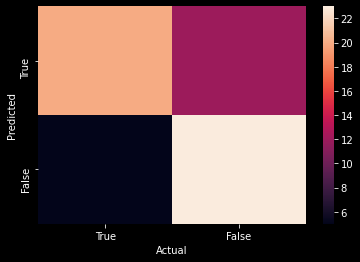

In [47]:
sns.heatmap(confusion_matrix(Y_test, y_pred), xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Predicted')
plt.xlabel('Actual')

## K = 5

In [48]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)

In [49]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(p=1)

In [50]:
y_pred = knn.predict(X_test)

In [51]:
val_arr.append(accuracy_score(Y_test, y_pred))
k_arr.append(5)
accuracy_score(Y_test, y_pred)

0.7666666666666667

In [52]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        32
           1       0.71      0.86      0.77        28

    accuracy                           0.77        60
   macro avg       0.78      0.77      0.77        60
weighted avg       0.78      0.77      0.77        60



In [53]:
confusion_matrix(Y_test, y_pred)

array([[22, 10],
       [ 4, 24]], dtype=int64)

Text(0.5, 15.0, 'Actual')

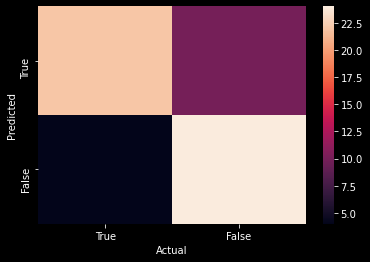

In [54]:
sns.heatmap(confusion_matrix(Y_test, y_pred), xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Predicted')
plt.xlabel('Actual')

## K = 7

In [55]:
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1)

In [56]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [57]:
y_pred = knn.predict(X_test)

In [58]:
val_arr.append(accuracy_score(Y_test, y_pred))
k_arr.append(7)
accuracy_score(Y_test, y_pred)

0.75

In [59]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.71      0.79      0.75        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



In [60]:
confusion_matrix(Y_test, y_pred)

array([[23,  9],
       [ 6, 22]], dtype=int64)

Text(0.5, 15.0, 'Actual')

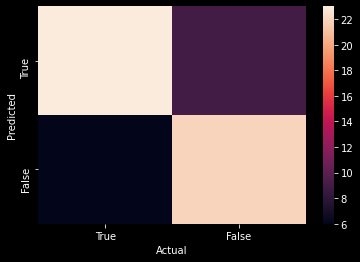

In [61]:
sns.heatmap(confusion_matrix(Y_test, y_pred), xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Predicted')
plt.xlabel('Actual')

## K = 9

In [62]:
knn = KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=1)

In [63]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [64]:
y_pred = knn.predict(X_test)

In [65]:
val_arr.append(accuracy_score(Y_test, y_pred))
k_arr.append(9)
accuracy_score(Y_test, y_pred)

0.7666666666666667

In [66]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



In [67]:
confusion_matrix(Y_test, y_pred)

array([[24,  8],
       [ 6, 22]], dtype=int64)

Text(0.5, 15.0, 'Actual')

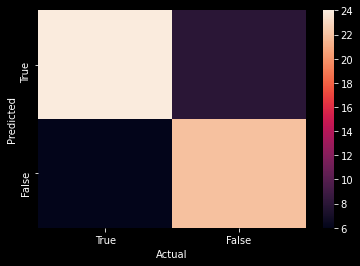

In [68]:
sns.heatmap(confusion_matrix(Y_test, y_pred), xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Predicted')
plt.xlabel('Actual')

## K = 13

In [69]:
knn = KNeighborsClassifier(n_neighbors=13, metric='minkowski', p=1)

In [70]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=13, p=1)

In [71]:
y_pred = knn.predict(X_test)

In [72]:
val_arr.append(accuracy_score(Y_test, y_pred))
k_arr.append(13)
accuracy_score(Y_test, y_pred)

0.7333333333333333

In [73]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        32
           1       0.71      0.71      0.71        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60



In [74]:
confusion_matrix(Y_test, y_pred)

array([[24,  8],
       [ 8, 20]], dtype=int64)

Text(0.5, 15.0, 'Actual')

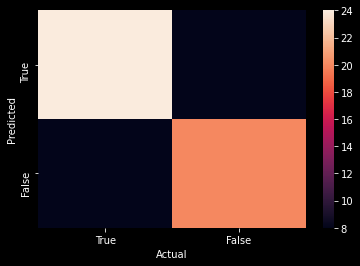

In [75]:
sns.heatmap(confusion_matrix(Y_test, y_pred), xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Predicted')
plt.xlabel('Actual')

## Visualization

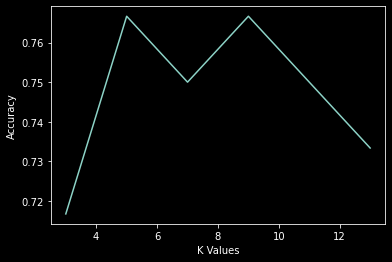

In [76]:
plt.plot(k_arr, val_arr)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.show()

# Test Size = 25%

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.25)

In [78]:
k_arr = []
val_arr = []
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((222, 13), (75, 13), (222, 1), (75, 1))

In [79]:
leaf_size = list(range(1,20))
n_neighbors = list(range(1,10))
p=list(range(1,5))

In [80]:
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [81]:
knn = KNeighborsClassifier()

In [82]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(knn, hyperparameters)

In [83]:
best_model = clf.fit(X_train, Y_train)

In [84]:
best_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [85]:
y_pred = best_model.predict(X_test)

In [86]:
accuracy_score(Y_test, y_pred)

0.8133333333333334

In [87]:
confusion_matrix(Y_test, y_pred)

array([[28, 10],
       [ 4, 33]], dtype=int64)

In [88]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        38
           1       0.77      0.89      0.82        37

    accuracy                           0.81        75
   macro avg       0.82      0.81      0.81        75
weighted avg       0.82      0.81      0.81        75



Text(0.5, 15.0, 'Actual')

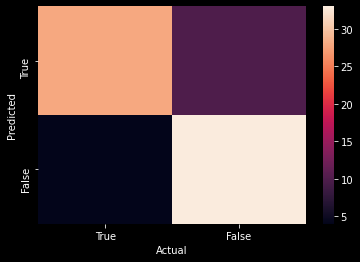

In [89]:
sns.heatmap(confusion_matrix(Y_test, y_pred), xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Predicted')
plt.xlabel('Actual')

# Test Size = 30%

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

In [91]:
k_arr = []
val1_arr = []
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((207, 13), (90, 13), (207, 1), (90, 1))

## Finding best value of n or K

In [92]:
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    val1_arr.append(accuracy_score(Y_test, y_pred))
    k_arr.append(i)

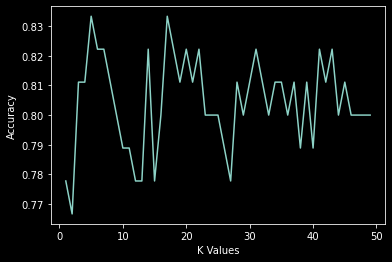

In [93]:
plt.plot(k_arr, val1_arr)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.show()

In [94]:
max(val1_arr)

0.8333333333333334

In [95]:
val1_arr.index(0.8333333333333334)

4

In [96]:
k_arr[4]

5

In [97]:
best_n = 5

In [98]:
knn = KNeighborsClassifier(n_neighbors=best_n, metric='manhattan')

In [99]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='manhattan')

In [100]:
y_pred = knn.predict(X_test)

In [101]:
accuracy_score(Y_test, y_pred)

0.8333333333333334

In [102]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        48
           1       0.79      0.88      0.83        42

    accuracy                           0.83        90
   macro avg       0.84      0.84      0.83        90
weighted avg       0.84      0.83      0.83        90



In [103]:
confusion_matrix(Y_test, y_pred)

array([[38, 10],
       [ 5, 37]], dtype=int64)

Text(0.5, 15.0, 'Actual')

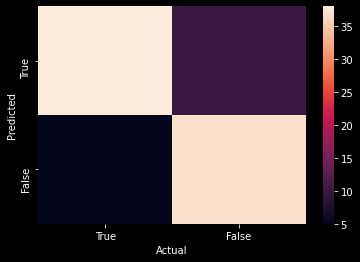

In [104]:
sns.heatmap(confusion_matrix(Y_test, y_pred), xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Predicted')
plt.xlabel('Actual')

## Finding best value of p

In [105]:
p_arr = []
val2_arr = []

In [106]:
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=i)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    val2_arr.append(accuracy_score(Y_test, y_pred))
    p_arr.append(i)

In [107]:
max(val2_arr)

0.8333333333333334

In [108]:
val2_arr.index(0.8333333333333334)

0

In [109]:
p_arr[0]

1

In [110]:
best_p = 1

In [111]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)

In [112]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(p=1)

In [113]:
y_pred = knn.predict(X_test)

In [114]:
accuracy_score(Y_test, y_pred)

0.8333333333333334

In [115]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        48
           1       0.79      0.88      0.83        42

    accuracy                           0.83        90
   macro avg       0.84      0.84      0.83        90
weighted avg       0.84      0.83      0.83        90



In [116]:
confusion_matrix(Y_test, y_pred)

array([[38, 10],
       [ 5, 37]], dtype=int64)

Text(0.5, 15.0, 'Actual')

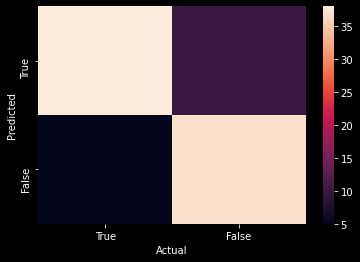

In [117]:
sns.heatmap(confusion_matrix(Y_test, y_pred), xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Predicted')
plt.xlabel('Actual')

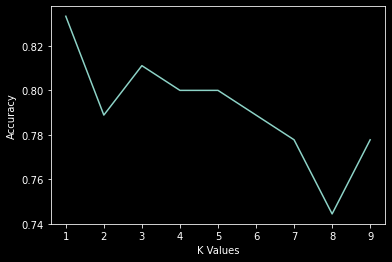

In [118]:
plt.plot(p_arr, val2_arr)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.show()

## Finding best value of leaf_node

In [119]:
leaf_arr = []
val3_arr = []

In [120]:
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1, leaf_size=i)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    val3_arr.append(accuracy_score(Y_test, y_pred))
    leaf_arr.append(i)

In [121]:
max(val3_arr)

0.8333333333333334

In [122]:
val3_arr.index(0.8333333333333334)

0

In [123]:
leaf_arr[0]

1

In [124]:
best_leaf = 1

In [125]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1, leaf_size=best_leaf)

In [126]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(leaf_size=1, p=1)

In [127]:
y_pred = knn.predict(X_test)

In [128]:
accuracy_score(Y_test, y_pred)

0.8333333333333334

In [129]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        48
           1       0.79      0.88      0.83        42

    accuracy                           0.83        90
   macro avg       0.84      0.84      0.83        90
weighted avg       0.84      0.83      0.83        90



In [130]:
confusion_matrix(Y_test, y_pred)

array([[38, 10],
       [ 5, 37]], dtype=int64)

Text(0.5, 15.0, 'Actual')

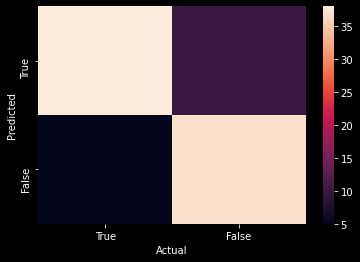

In [131]:
sns.heatmap(confusion_matrix(Y_test, y_pred), xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Predicted')
plt.xlabel('Actual')

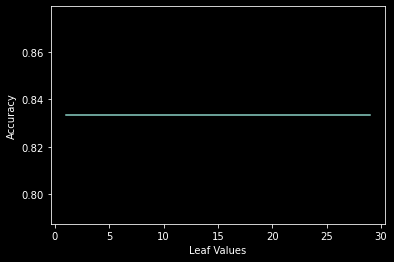

In [132]:
plt.plot(leaf_arr, val3_arr)
plt.xlabel('Leaf Values')
plt.ylabel('Accuracy')
plt.show()

Text(0, 0.5, 'Accuracy')

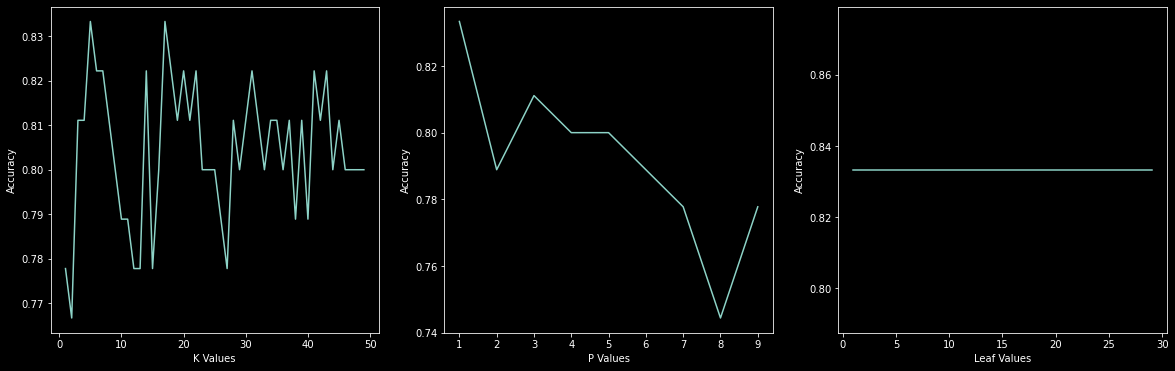

In [133]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,3,1)
plt.plot(k_arr, val1_arr)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
fig.add_subplot(1,3,2)
plt.plot(p_arr, val2_arr)
plt.xlabel('P Values')
plt.ylabel('Accuracy')
fig.add_subplot(1,3,3)
plt.plot(leaf_arr, val3_arr)
plt.xlabel('Leaf Values')
plt.ylabel('Accuracy')

# Inference

Basic functions are used to check the details of the given dataset. The univariate and bivariate analysis is done for finding relationship and distribution of data. Standard Scaler and Normalizer are the two most common methods used for normalizing the dataset. The KNN algorithm is applied to whole dataset with different parameters and training and test ratio. Different test and train ratios are used and we can conclude that best partition rate for our algorithm can be between 25-30% which is all the industry specified ratio. The confusion matric and accuracy is shown and printed for all the cases. Line plots are used to visualise the results and interpret them easily. Line plot is plotted with accuracy and different values of K, P and leaf size. We can conclude that from the KNN models, we can get a maximum accuracy of 83.4%. After hyperparameter tuning we can say that minkowski with p value 1 or manhattan distance is best in this model. The number of desired number of K value is 5 and number of leaf nodes can be any as in our case it doesn't affects the performance of our model. It can be said if our model is asked to predict 100 values then around 83 values from them will be predicted in a right manner.